Customer churn prediction is to measure why customers are leaving a business. I am using here Telco Customer Data from Kaggle. Will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Upload files
from google.colab import files
uploaded=files.upload()

Saving customer_churn.csv to customer_churn.csv


In [94]:
#Store the data into a dataframe variable
churn_data=pd.read_csv('customer_churn.csv')

In [95]:
#Show the five sample rows
churn_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4784,1622-HSHSF,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.55,19.55,No
5980,7049-GKVZY,Female,0,No,No,17,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),79.85,1387.35,No
2081,5934-TSSAU,Female,0,Yes,Yes,23,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1702.9,No
1268,2408-TZMJL,Male,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.15,6448.05,Yes
518,0257-ZESQC,Female,1,Yes,No,27,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.20,1929.35,Yes


In [96]:
#Drop the ID column, as it is not needed for our model.
churn_data.drop('customerID',axis='columns',inplace=True)

In [97]:
#Showing the columns and datatypes
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [98]:
#Checking values on MonthlyCharges
churn_data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [99]:
#Quick glance at above makes me realize that TotalCharges should be float but it is an object. 
#Let's check what's going on with this column
churn_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [100]:
#Ohh...no.. it is string. Lets convert it to numbers
pd.to_numeric(churn_data.TotalCharges)

ValueError: ignored

In [ ]:
#Hmmm... some values seems to be blank string. Let's find out such rows.
#errors='coerce' will coerce the error
churn_data[pd.to_numeric(churn_data.TotalCharges,errors='coerce').isnull()]

We can see  that the TotalCharges are blank for the above 11 rows

In [101]:
#Finding total rows in the data
churn_data.shape

(7043, 20)

In [102]:
#Let us drop those 11 rows. To drop that we need to find the form of how the blank data looks like.
churn_data.iloc[488].TotalCharges

' '

In [103]:
#Find number of rows having non null value for TotalCharges
churn_data[churn_data.TotalCharges!=' '].shape

(7032, 20)

In [104]:
#Remove rows with space in TotalCharges
churn_data = churn_data[churn_data.TotalCharges!=' ']
churn_data.shape


(7032, 20)

In [105]:
#Find datatypes of all columns in the new dataset
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [106]:
#Now let change the datatype of TotalCharges
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges)

In [107]:
#Now let us check the values
churn_data.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [108]:
#Finding the data of the customers which are not leaving
churn_data[churn_data.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Visualize the tenure of both customer categories

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


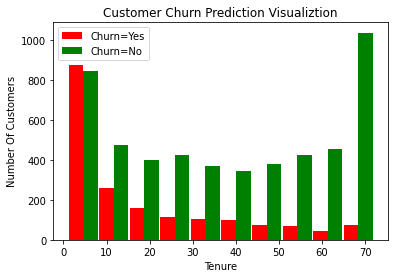

In [109]:
# Find what is the tenure of those customers who are leaving and not leaving
tenure_churn_no = churn_data[churn_data.Churn=='No'].tenure
tenure_churn_yes = churn_data[churn_data.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()


We can see that customers with tenure around 70 months tends to not churn, than the other category. Let us do the same kind of plot for monthly charges. Sometimes the monthly charges will be very high. So here lets see whether that is causing the churn.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


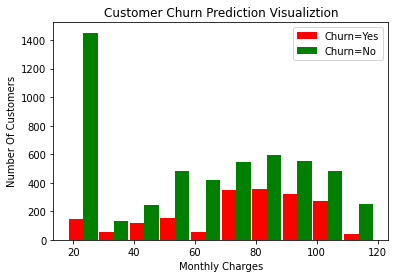

In [110]:

mc_churn_no = churn_data[churn_data.Churn=='No'].MonthlyCharges      
mc_churn_yes = churn_data[churn_data.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Customers who have less monthly charges are not churning much compared to the high monthly charges.

In [111]:
# Showing unique values of each columns which is having object datatype.


def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')


print_unique_col_values(churn_data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Data Cleaning

Some of the columns have no internet service or no phone service, that can be replaced with a simple No.

In [112]:
churn_data.replace('No internet service','No',inplace=True)
churn_data.replace('No phone service','No',inplace=True)

In [113]:
print_unique_col_values(churn_data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Convert Yes and No to 1 or 0

In [114]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    churn_data[col].replace({'Yes': 1,'No': 0},inplace=True)

In [115]:
for col in churn_data:
    print(f'{col}: {churn_data[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [116]:
# Let us do the same thing for 'gender' column as well.
churn_data['gender'].replace({'Female':1,'Male':0},inplace=True)

In [117]:
for col in churn_data:
    print(f'{col}: {churn_data[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


# Feature Engineering

One hot encoding for categorical columns. Remember, we need to drop one dummy from each, as it can cause multicollinearity

In [118]:
churn_data = pd.get_dummies(data=churn_data, columns=['InternetService','Contract','PaymentMethod'],drop_first = True)
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [119]:
churn_data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6488,1,0,0,0,1,1,0,0,0,0,0,0,0,1,69.50,69.50,1,1,0,0,0,0,1,0
1481,0,0,1,1,72,0,0,1,1,1,1,1,1,1,65.10,4754.30,0,0,0,0,1,1,0,0
4931,0,0,1,0,15,1,1,0,0,1,1,1,1,1,103.45,1539.80,0,1,0,0,0,0,1,0
4741,1,1,1,0,15,1,0,0,1,0,0,1,1,1,94.65,1285.05,0,1,0,0,0,0,1,0
5935,0,1,0,0,13,1,0,0,1,0,0,1,0,1,59.90,788.35,0,0,0,0,0,0,1,0


In [120]:
churn_data.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

Now we have 24 columns and all datatypes are in numbers. No string or text

# Before Feature Scaling and handlind the imbalance in the dataset, at first we need to split the dataset into train and test. Otherwise, it will cause data leakage problem.

In [164]:
#Following will split the data into train and test after randomizing it.
import sklearn.model_selection
train, test = train_test_split(churn_data, train_size = 0.8)

In [165]:
train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1397,1,0,0,0,4,1,0,0,0,1,0,0,1,1,82.85,319.60,0,1,0,0,0,1,0,0
4376,1,0,0,0,45,1,0,1,1,0,0,1,1,1,100.30,4483.95,0,1,0,1,0,0,1,0
3979,0,0,1,1,66,1,1,0,0,0,0,0,0,1,25.30,1672.35,0,0,1,0,1,1,0,0
5340,1,0,0,0,38,1,1,1,1,1,0,1,1,0,84.10,3187.65,0,0,0,1,0,0,0,0
6015,1,0,0,0,3,1,0,1,0,0,0,0,0,1,74.55,233.65,0,1,0,0,0,0,1,0


In [166]:
test.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2070,1,0,0,0,49,1,1,1,1,0,0,0,0,1,59.75,2934.30,1,0,0,0,0,1,0,0
1216,0,0,1,1,54,1,0,0,0,0,0,0,0,0,20.40,1090.60,0,0,1,0,1,1,0,0
2756,1,0,0,0,1,1,0,0,0,0,0,0,0,0,20.95,20.95,1,0,1,0,0,0,0,1
6843,1,0,1,0,9,1,1,1,1,1,0,0,0,0,91.75,865.80,1,1,0,0,0,0,0,0
6032,0,1,1,0,68,1,1,0,1,1,0,1,1,1,105.30,7299.65,1,1,0,0,0,0,1,0


In [167]:
# Let us scale the tenure , MonthlyCharges and TotalCharges into 0,1 range for X_train and X_test dataset.

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])
test[cols_to_scale] = scaler.fit_transform(test[cols_to_scale])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

# Mitigating Skewness of Data

# SMOTE for oversampling to handle imbalance dataset.

In [168]:
#Now let us deal the class imbalance. We had seen before that the Churn=0 class is more than Churn=1.
#We will do oversampling for the training data only. We should not touch test data in this case.

train_class_1=train[train['Churn']==1]
train_class_0=train[train['Churn']==0]

count_0=len(train_class_0)
count_1=len(train_class_1)
print(count_0,count_1)

4152 1473


In [169]:
from imblearn.over_sampling import SMOTE

X = train.drop('Churn',axis='columns')
y = train['Churn']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

unique_elements, counts_elements = np.unique(y_sm, return_counts=True)
print("Frequency of unique values of the y_sm array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the y_sm array:
[[   0    1]
 [4152 4152]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Now both the classes have same number of values.

In [170]:
X_train=X_sm
y_train=y_sm
X_test=test.drop('Churn',axis='columns')
y_test=test['Churn']

In [171]:
X_train.shape

(8304, 23)

In [172]:
y_train.shape

(8304,)

In [173]:
X_test.shape

(1407, 23)

In [174]:
y_test.shape

(1407,)

We have 23 columns in training dataset.  

# Build a model (ANN) in tensorflow/keras

In [176]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100,batch_size=5)

Epoch 1/100
1661/1661 [==============================] - 3s 1ms/step - loss: 0.5624 - accuracy: 0.7218
Epoch 2/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4559 - accuracy: 0.7917
Epoch 3/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4649 - accuracy: 0.7810
Epoch 4/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4609 - accuracy: 0.7781
Epoch 5/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4523 - accuracy: 0.7823
Epoch 6/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4453 - accuracy: 0.7893
Epoch 7/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4385 - accuracy: 0.7912
Epoch 8/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4228 - accuracy: 0.7948
Epoch 9/100
1661/1661 [==============================] - 2s 1ms/step - loss: 0.4251 - accuracy: 0.7974
Epoch 10/100
1661/1661 [==============================] - 2s 1ms/step - l

Evaluate the model on test data.

In [177]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 944us/step - loss: 0.6502 - accuracy: 0.7285


[0.6501957774162292, 0.7285003662109375]

Get the predictions to evaluate precision, recall and f1-score

In [178]:
yp = model.predict(X_test)
yp

array([[1.2720403e-01],
       [4.1303378e-05],
       [3.7978595e-01],
       ...,
       [9.7697735e-01],
       [5.6316018e-02],
       [6.9424152e-02]], dtype=float32)

In [179]:
#Coverting yp into (1 or 0) form
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [180]:
y_pred[:10]

[0, 0, 0, 1, 1, 0, 0, 1, 1, 1]

In [181]:
y_test[:10]

2070    1
1216    0
2756    1
6843    1
6032    1
2575    0
1273    0
6808    0
863     1
456     0
Name: Churn, dtype: int64

In [182]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1011
           1       0.51      0.63      0.57       396

    accuracy                           0.73      1407
   macro avg       0.68      0.70      0.68      1407
weighted avg       0.75      0.73      0.74      1407



Text(69.0, 0.5, 'Truth')

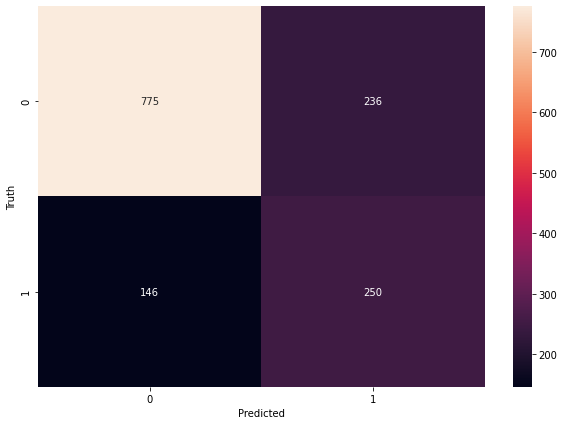

In [183]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')